# Facial Keypoints Detection 

## Description
This Notebook propose a solution for a Facial Keypoints detection problem using the data proposed by this <a href="https://www.kaggle.com/c/facial-keypoints-detection/overview">competition</a> in kaggle.
## Method of resolution 
<ul>
    <li>Import llibraries</li>
    <li>Load the data from the csv files </li>
    <li>Preprocessing the data</li>
    <li>Save the images into folders to reduce the memory used in the python file</li>
    <li>Split the data into training and validation images </li>
    <li>Load the VGG model to use it as a features extractor</li>
    <li>Build the final model by adding some Dense layers</li>
    <li>Fit the model </li>
    <li>Predict the images from the test data</li>
</ul>

### Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image ,ImageOps

import seaborn as sns
%matplotlib inline

### Load the data 

In [2]:
df = pd.read_csv('training/training.csv')
test_df = pd.read_csv('test/test.csv')

### Exploring the dataset

In [3]:
#Exploring the dataset
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [6]:
#erasing data with none values
df = df.dropna()

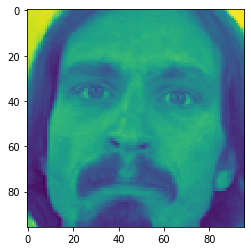

In [8]:
image = np.array(list(map(int,df['Image'][0].split()))).reshape((96,96))
plt.imshow(image)

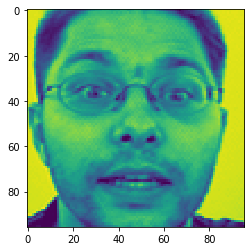

In [10]:
image = np.array(list(map(int,test_df['Image'].iloc[0].split()))).reshape((96,96))
plt.imshow(image)

In [11]:
training_images_path = 'training_images\\' # where to save training images
test_images_path = 'test_images\\' # where to save testing images
nb_train_images = len(df) # number of train images
nb_test_images = len(test_df) # number of test images
print("We have {} training samples".format(nb_train_images))
print("We have {} testing samples to predict".format(nb_test_images))

We have 2140 training samples
We have 1783 testing samples to predict


In [12]:
# function to save the images into the disk
def save_images():
    for i in range(nb_train_images):
        image =  np.array(list(map(int,df['Image'].iloc[i].split()))).reshape((96,96))
        im = Image.fromarray(image)
        im.save(training_images_path+str(i)+'.png')
    for i in range(nb_test_images):
        image = np.array(list(map(int, test_df['Image'].iloc[i].split()))).reshape((96,96))
        im = Image.fromarray(image)
        im.save(test_images_path+str(i)+'.png')

In [13]:
#save_images() # this is commented so i don't run it again because i want to save the images only once into the folders

In [14]:
#extract the values as numpy array from the dataframe
y_total = df.drop('Image',axis=1).values 

In [15]:
#function to draw an example from the training set using it's index
def show_example_from_training_set(index):
    im = Image.open(training_images_path+str(index)+'.png')
    X = y_total[index,:].reshape((-1,2)).T
    x= X[0,:]
    y= X[1,:]
    plt.imshow(im)
    plt.plot(x,y, 'ro')
    plt.show()

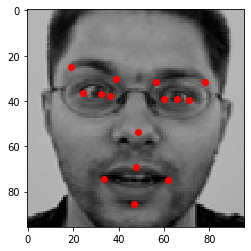

In [16]:
show_example_from_training_set(350)

In [17]:
#function to draw an images with it's prediction and it's real values if given
def show_exemple_from_prediction(image, X,X_labels=None):
    if(not(X_labels is None)):
        X_labels = X_labels.reshape((-1,2)).T
        x_labels= X_labels[0,:]
        y_labels= X_labels[1,:]
        plt.plot(x_labels,y_labels, 'ro')
    X = X.reshape((-1,2)).T
    x= X[0,:]
    y= X[1,:]
    im = Image.fromarray(image)
    plt.imshow(im)
    plt.plot(x,y, 'bo')
    
    plt.show()

In [18]:
# splitting training and validation data 
perm = np.random.permutation(nb_train_images) ## permution
nb_train = int(nb_train_images*0.85) # number of training images
nb_valid = nb_train_images-nb_train # number of validation images
train_array = np.array(perm[:nb_train]) # indexes of training images
valid_array = np.array(perm[nb_train:]) # indexes of validation images

In [19]:
#function to generate batch using the indexes given 
def generate_batch(indices):
    images = np.zeros((indices.shape[0],96,96,3))
    labels = y_total[indices,:]
    for i in range(indices.shape[0]):
        image = Image.open(training_images_path+str(indices[i])+'.png')
        for j in range(3):
            images[i,:,:,j]=image.copy()
    return images,labels

### Load the VGG pretrained model and other libraries

In [21]:
#libraries
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Flatten
from keras.models import model_from_json
from keras import Sequential
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [22]:
#function to preprocess input for VGG model
def preprocess_batch(batch_images):
    return preprocess_input(batch_images)

In [23]:
# load X_train, X_valid , y_train, and y_valid
X_train,y_train = generate_batch(train_array)
X_valid ,y_valid= generate_batch(valid_array)
X_train = np.array(X_train)
X_valid = np.array(X_valid)

In [24]:
#preprocess X_train and X_valid 
X_train=preprocess_batch(X_train)
X_valid=preprocess_batch(X_valid)

In [25]:

tf.reset_default_graph()

new_input = Input(shape=(96, 96, 3)) # define new input shape

model = VGG16(include_top = False ,input_tensor=new_input) # load VGG16 model


for layer in model.layers:
    layer.trainable = False #  make layers of VGG as non trainable 

flat1 = Flatten()(model.outputs[0])  ## flatten the ouput of the VGG16 model
dense1 = Dense(1024, activation='relu')(flat1) ## dense layer
outputs = Dense(30, activation='relu')(dense1) ## output layer
my_model = Model(inputs = model.inputs, outputs= outputs) ## define the model
my_model.compile(
            loss='mse', ## mean squared error : continuous data
            optimizer='adam', ## adam optimizer 
            metrics=[tf.keras.metrics.RootMeanSquaredError()])



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
nb_epochs = 10 ## number of epochs
batch_size = 10 ## batch size

In [30]:
my_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0   

In [31]:
my_model.fit(X_train, y_train, epochs=nb_epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
1819/1819 [==============================] - 604s 332ms/step - loss: 115.5533 - root_mean_squared_error: 15.6331
Epoch 2/10
1819/1819 [==============================] - 584s 321ms/step - loss: 37.4746 - root_mean_squared_error: 9.6127
Epoch 3/10
1819/1819 [==============================] - 620s 341ms/step - loss: 24.8130 - root_mean_squared_error: 8.1850
Epoch 4/10
1819/1819 [==============================] - 577s 317ms/step - loss: 17.9344 - root_mean_squared_error: 7.3180
Epoch 5/10
1819/1819 [==============================] - 601s 330ms/step - loss: 13.8116 - root_mean_squared_error: 6.7092
Epoch 6/10
1819/1819 [==============================] - 561s 309ms/step - loss: 13.7412 - root_mean_squared_error: 6.2839
Epoch 7/10
1819/1819 [==============================] - 607s 334ms/step - loss: 11.7487 - root_mean_squared_error: 5.9406
Epoch 8/10
1819/1819 [==============================] - 668s 367ms/step - loss: 8.8496 - root_mean_squared_error: 5.6518
Epoch 9/10
1819/1819 [=

In [32]:
# get the root mean squared error
score = my_model.evaluate(X_valid, y_valid)
print("the root mean squared error score : ", score[1])

321/321 [==============================] - 101s 314ms/step
[25.950746863059166, 5.078938961029053]


In [33]:
#to save the model
model_json = my_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
my_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
# load the trained model which will be in the file 
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [74]:
#predict the ouput for a given image
def get_positions(image):
    images_to = np.zeros((1,96,96,3))
    print(image.shape)
    for j in range(3):
            images_to[0,:,:,j]=image[:,:].copy()
    images_to = preprocess_batch(images_to)
    preds = loaded_model.predict(images_to)
    return preds

In [75]:
#get image from path with index = index
def get_image(index, path):
    image = Image.open(path+str(index)+'.png')
    image.thumbnail((96,96,1), Image.ANTIALIAS)
    return np.array(image)

(96, 96)


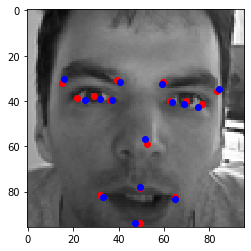

In [83]:
ind=5 
image = get_image(ind,training_images_path) ## load the image
pos = get_positions(image) # get predictions

show_exemple_from_prediction(image,pos, y_total[ind,:]) ## show the result